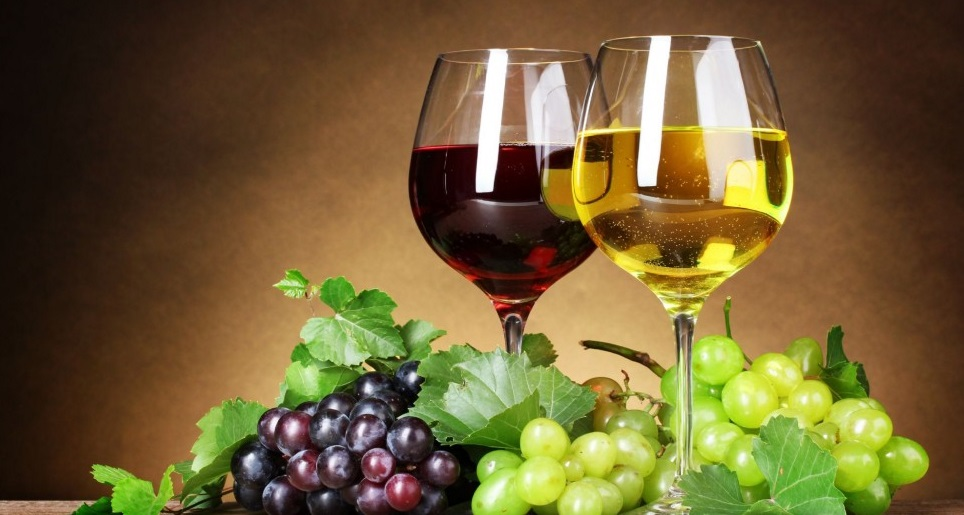

<a name="índice"></a>
# Índice
[Extra Trees Classifier](#etc)<br>
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [64]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [65]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características
# Obs1: Verificar se todos os atributos são importantes para o modelo

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [66]:
# Classificação de binhos tinto e branco

# Head

In [67]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [68]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

11/12/2023  17:15    <DIR>          .
29/11/2023  09:13    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
29/11/2023  09:27    <DIR>          .ipynb_checkpoints
11/12/2023  17:15         1.145.826 CLASSIFICA€ÇO_Wine_Kaggle_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.281.539 bytes
               3 pasta(s)   880.278.417.408 bytes dispon¡veis


# Library installation

In [69]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod
# !pip install tensorflow

# Import libs

In [70]:
# para verificar dados relativos a versão utilizada
import sys
import sklearn

# função utilizada para registrar data e hora no nome do modelo salvo
from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# trabalhar com os dados com rede neural
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
# from imblearn import under_sampling, over_sampling # verificar se realmente é necessária essa linha - reduntante!!!
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Gráfico da Árvore
from sklearn.tree import plot_tree

# Configuração da Validação Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

# Combinação dos modelos
from sklearn.ensemble import VotingClassifier

In [71]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [72]:
print(sklearn.__version__)

1.3.0


# Load data

In [73]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [74]:
df.sample(15).T

,4778,5677,3469,2564,918,3577,1989,657,1823,4641,1626,419,5522,786,2287
fixed_acidity,8.5,5.8,6.3,8.3,8.4,7.9,7.0,12.0,6.3,6.3,7.0,6.8,8.6,9.9,7.2
volatile_acidity,0.2,0.23,0.19,0.23,0.36,0.33,0.3,0.5,0.495,0.33,0.28,0.77,0.31,0.35,0.28
citric_acid,0.4,0.21,0.21,0.43,0.32,0.26,0.38,0.59,0.22,0.42,0.39,0.0,0.3,0.41,0.3
residual_sugar,1.1,1.5,1.8,3.2,2.2,1.2,14.9,1.4,1.8,17.2,8.7,1.8,0.9,2.3,10.7
chlorides,0.046,0.044,0.049,0.035,0.081,0.044,0.032,0.073,0.046,0.037,0.051,0.066,0.045,0.083,0.044
free_sulfur_dioxide,31.0,21.0,35.0,14.0,32.0,23.0,60.0,23.0,31.0,57.0,32.0,34.0,16.0,11.0,61.0
total_sulfur_dioxide,106.0,110.0,163.0,101.0,79.0,103.0,181.0,42.0,140.0,170.0,141.0,52.0,109.0,61.0,222.0
density,0.99194,0.99138,0.9924,0.9928,0.9964,0.9932,0.9983,0.998,0.9929,0.99884,0.9961,0.9976,0.99249,0.9982,0.9972
pH,3.0,3.3,3.31,3.15,3.3,3.19,3.18,2.92,3.39,3.26,3.38,3.62,2.95,3.21,3.14
sulphates,0.35,0.57,0.5,0.36,0.72,0.54,0.61,0.68,0.54,0.57,0.53,0.68,0.39,0.5,0.5


In [75]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [77]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [78]:
df.shape

(6497, 13)

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [80]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [81]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [82]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

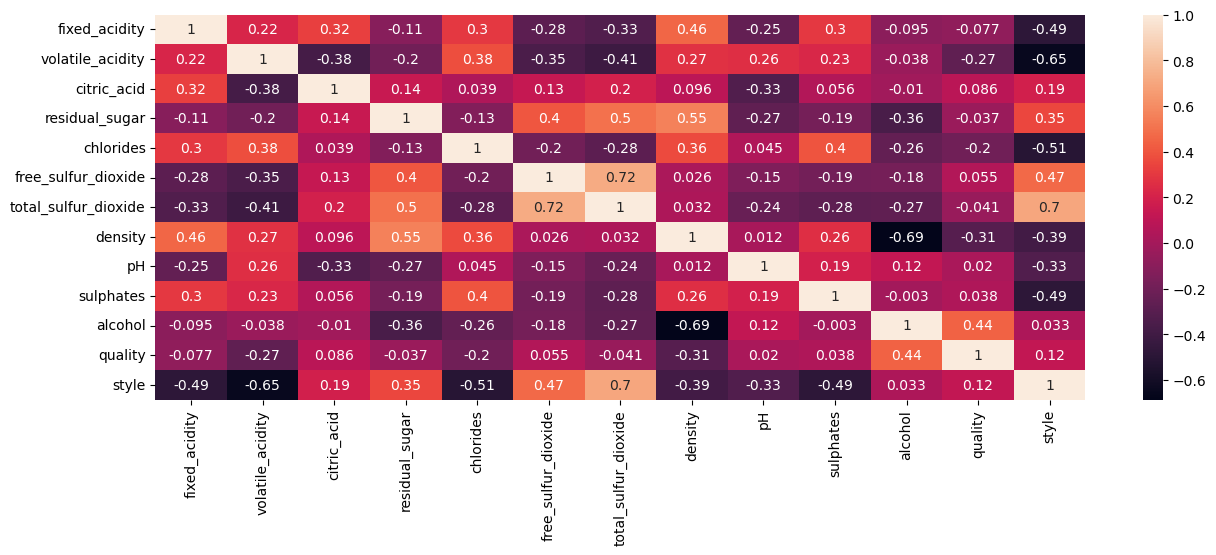

In [83]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [84]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

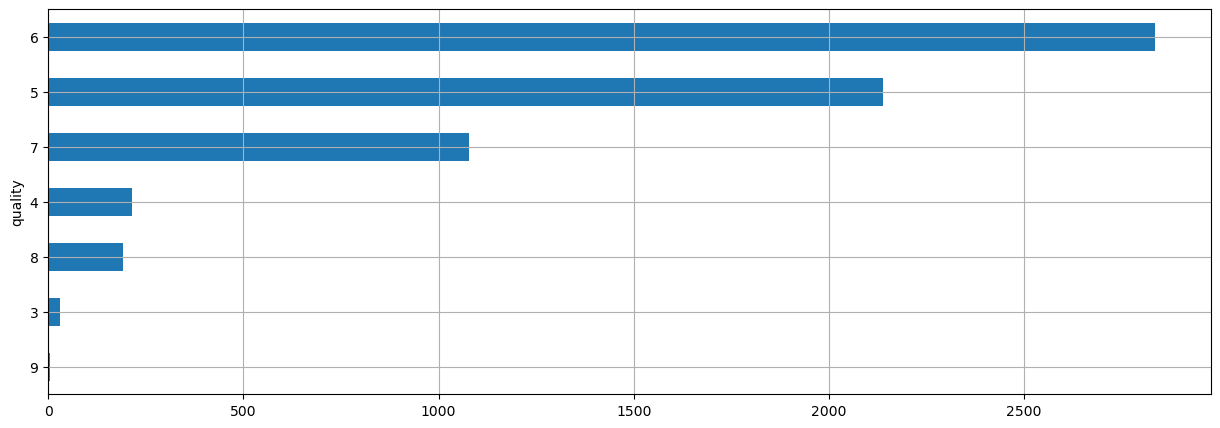

In [85]:
# wine ranking
plt.figure(figsize=(15,5))
df['quality'].value_counts(ascending=True).plot.barh()
plt.grid()
plt.show();

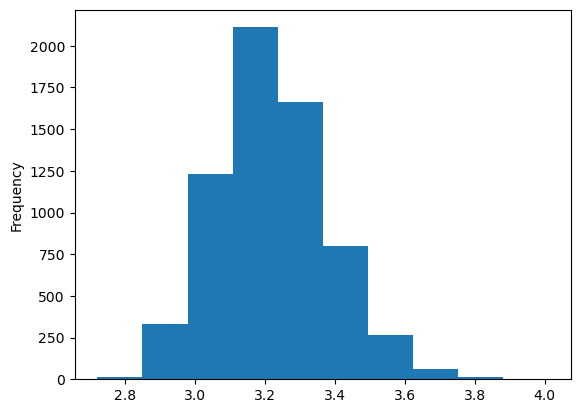

In [86]:
# frequência geral de pH dos vinhos
df['pH'].plot.hist();

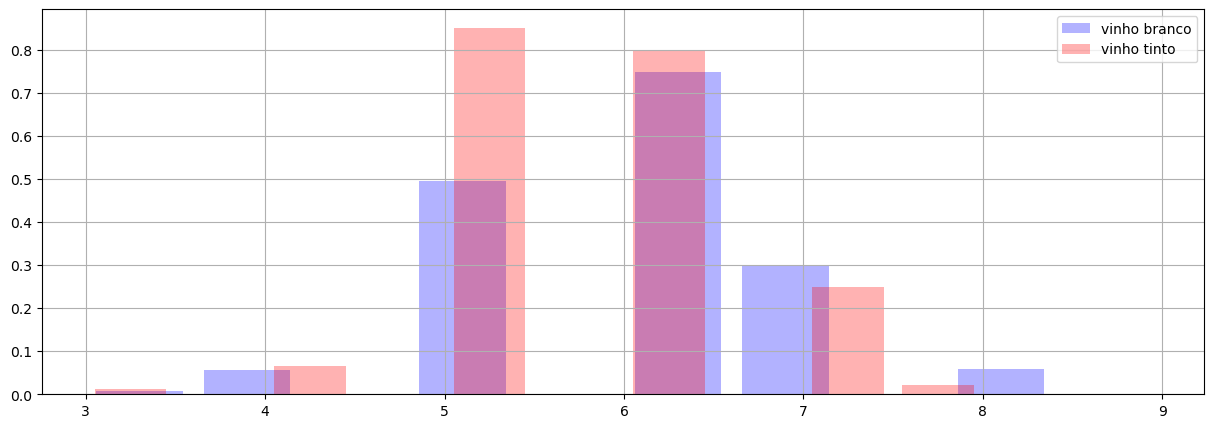

In [87]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

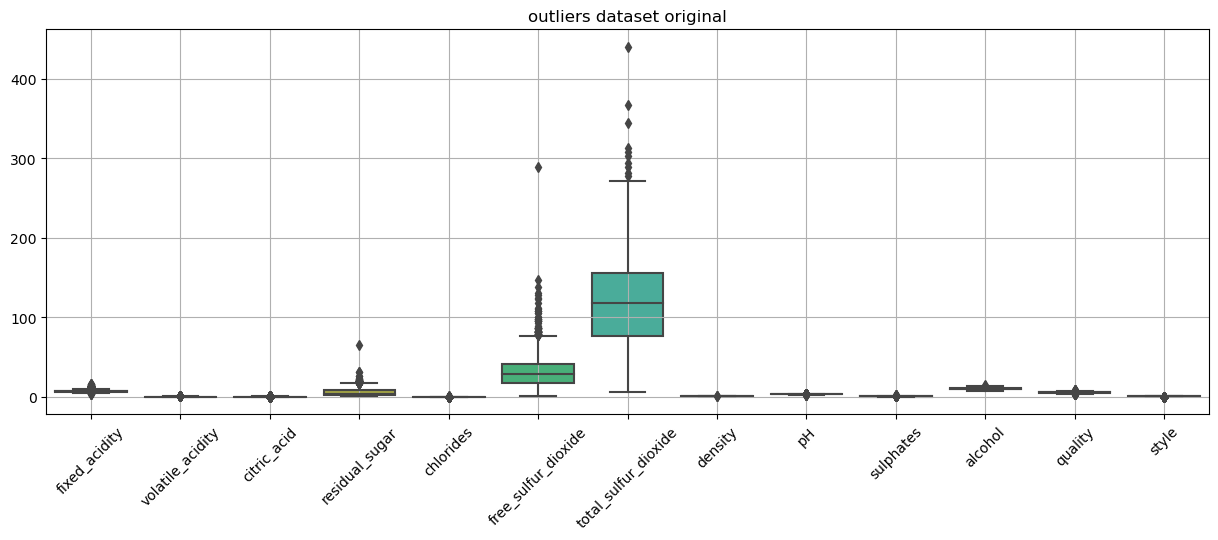

In [88]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [89]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

,perc_BLI,quant_dados_BLS,menor_valor_serie,LI_box_splot,q1,q2,q3,LS_box_splot,maior_valor_serie,quant_dados_ALS,perc_ALS
0,0.0,0,6.0,-41.5,77.0,118.0,156.0,274.5,440.0,10,0.153917


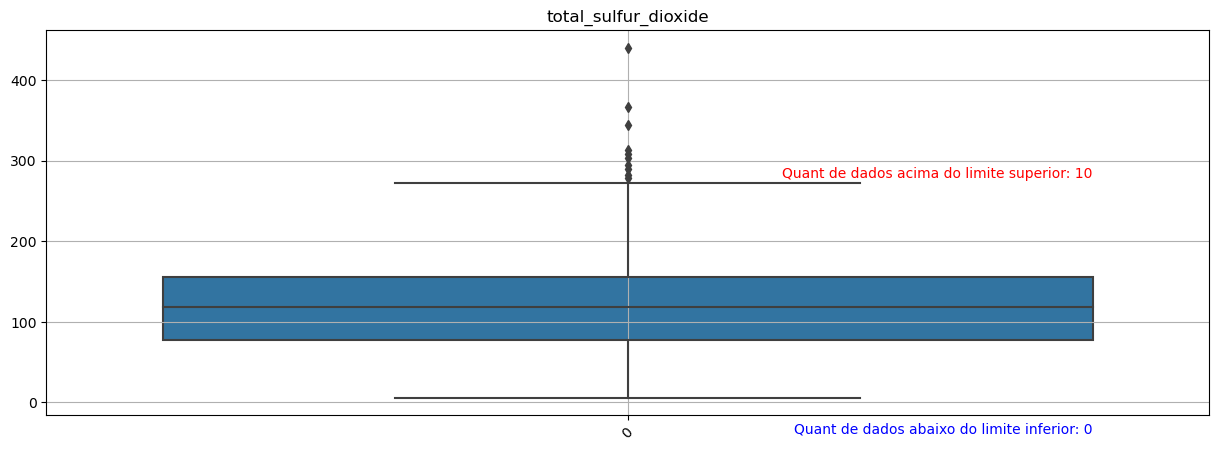

In [90]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [91]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,0
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,0
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,1
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,1
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,1
3726,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,1
3977,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,1
4253,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5,1
4751,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,1
6344,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,1


In [92]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: uma das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [93]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [95]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [96]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [97]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [98]:
# df_sem_outliers

In [99]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

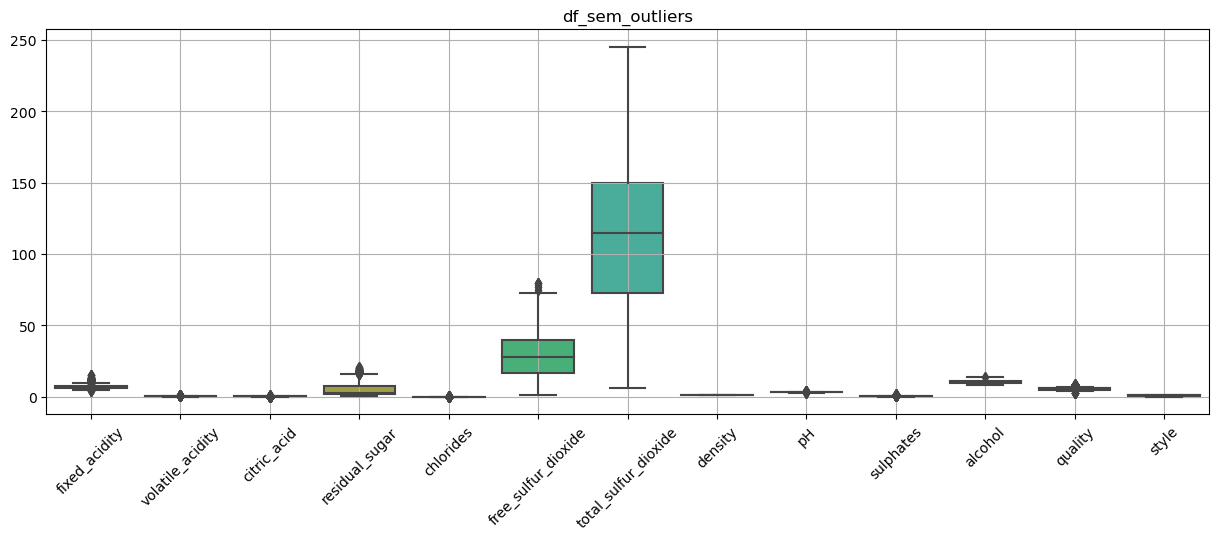

In [100]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

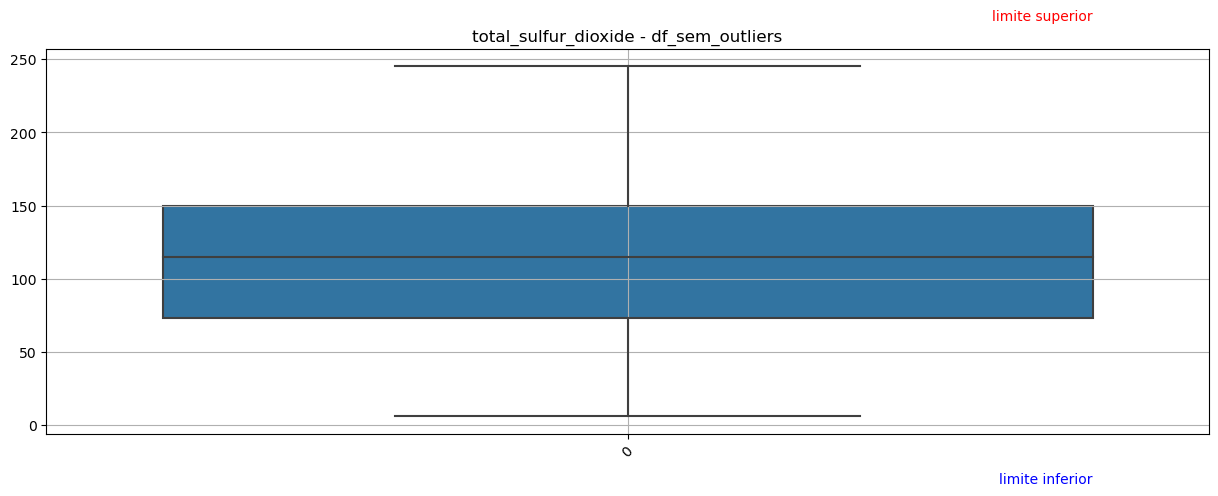

In [101]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [102]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.10)

In [103]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((5262, 12), (5262,))

In [104]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [105]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

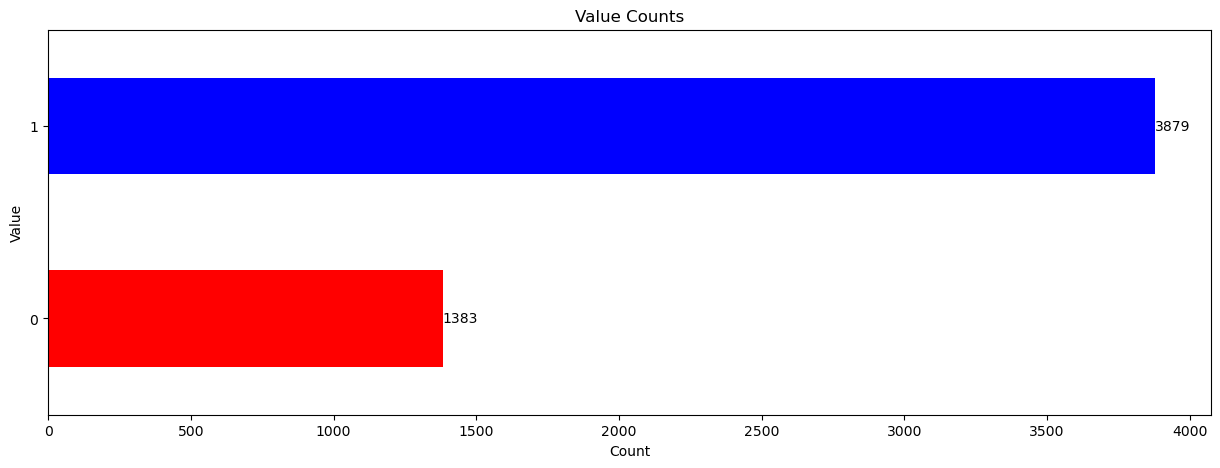

In [106]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [107]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1383, 3879], dtype=int64))

In [108]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(26.28278221208666, 73.71721778791334)

# Data balancing

In [109]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [110]:
# y_bal.value_counts()

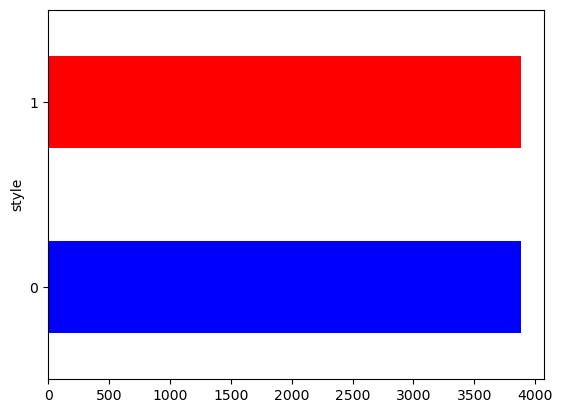

In [111]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

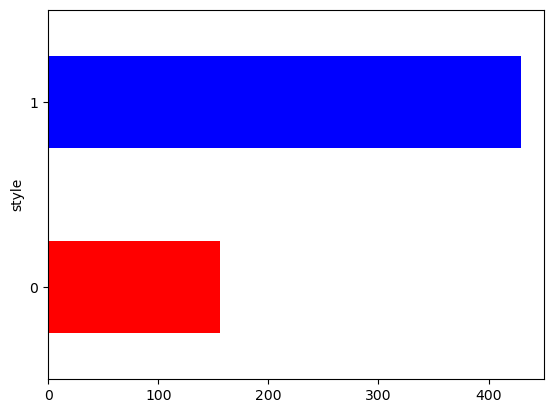

In [112]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [113]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [114]:
X_bal_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
7753,0.105538,1.413689,-1.475298,-0.586637,0.425313,-1.254494,-1.180994,0.991653,1.464309,2.172441,-0.683809,-0.826621
7754,-1.083752,0.283906,-1.737294,-0.588086,0.303710,0.023099,-0.808554,-0.477525,1.516302,-0.123521,0.642119,-0.826621
7755,-0.495664,0.538380,-1.384099,-0.694774,0.353100,-0.491630,-0.719878,0.117009,0.650459,1.423758,-0.872502,-0.826621
7756,1.161586,1.451165,-0.488775,-0.474204,0.230686,0.434944,-0.287258,0.771015,0.447723,0.183115,-0.282359,-0.826621
7757,-0.373951,1.483534,-1.762513,-0.586838,0.319667,-1.087728,-1.322876,-0.089657,0.437675,0.151271,-0.282490,-0.826621


In [115]:
# df_padronizado.describe().T

In [116]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [117]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
580,-1.382262,-0.922472,-0.424542,-0.033855,-0.407269,0.107621,0.083575,0.023086,1.171657,-0.835258,-0.992369,0.127709
581,-0.080982,-0.258531,1.428357,2.065953,-0.156448,0.740371,1.112676,1.143357,-0.990939,-0.114659,-0.822416,1.259671
582,-0.406302,0.239426,0.604846,1.660308,0.038635,1.436395,2.104355,1.466991,0.183042,-0.174709,-1.417250,0.127709
583,-0.894282,-1.033129,-0.561794,-0.797421,-0.379400,0.487271,-0.047401,-1.381698,0.059465,-1.315657,0.707158,0.127709
584,-0.162312,-0.590501,0.261717,-0.057716,-0.435138,0.930196,0.981700,-0.314773,-0.187689,0.305690,0.027347,0.127709


# Normalization

In [118]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [119]:
# df_normalizado.describe().T

In [120]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

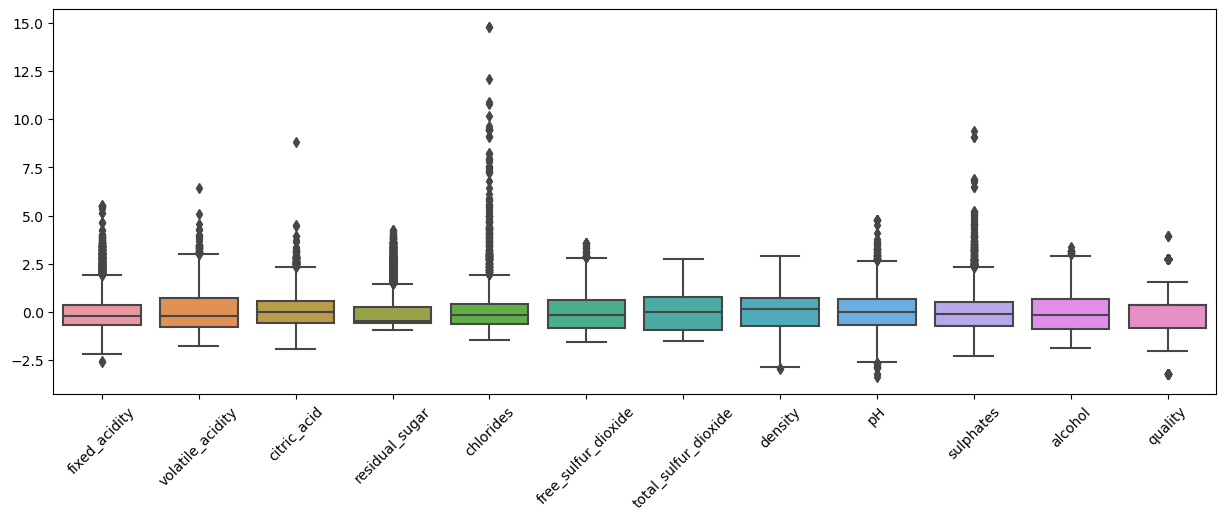

In [121]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# VALIDAÇÃO HOLDOUT
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [122]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [123]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((5430, 12), (2328, 12), (5430,), (2328,), 2723, 2707)

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [124]:
# Treinar o modelo
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)
etc_y_pred = etc.predict(X_ts)

In [125]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
# etc.predict_proba(X_ts)

In [126]:
# pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

# EVALUATION

In [127]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [128]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9926647731969721

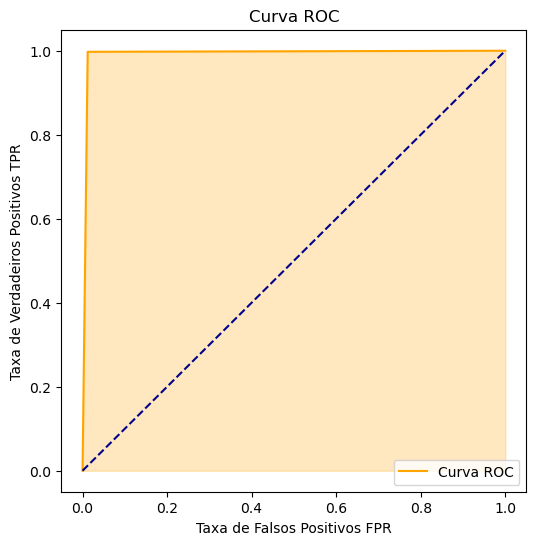

AUC: 0.99


In [129]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [130]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9926975945017182


In [131]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9926975945017182


In [132]:
# média dos acertos do modelo em relação aos valores corretos da base de dados
np.mean(y_ts == etc_y_pred)

0.9926975945017182

In [133]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.9974402730375427


In [134]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.9881656804733728


In [135]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1142,   14],
       [   3, 1169]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [136]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9926975945017182


In [137]:
# print(classification_report(y_ts, etc_y_pred))

In [138]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9927813163481953

In [139]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

,400,401,402,403,404,405,406,407,408,409
fixed_acidity,0.000348,-0.975612,0.244337,-0.731622,0.244337,1.708277,3.904185,1.057637,-1.382262,-0.243642
volatile_acidity,1.345995,-0.811815,-0.922472,-0.369187,-0.092545,1.180010,1.290667,-0.203202,-0.313859,0.460740
citric_acid,-2.071563,-0.493168,0.261717,1.016602,-0.287290,-0.836297,2.457745,-0.081413,1.153853,-0.012787
residual_sugar,-0.654252,-0.821283,-0.534945,0.610404,-0.558807,-0.797421,-0.582668,-0.439499,-0.463361,-0.344054
chlorides,0.623885,-0.518745,-0.713828,-0.295793,-0.435138,0.623885,0.456671,3.856689,-0.100710,-0.630221
free_sulfur_dioxide,-0.145478,0.613821,0.107621,1.120021,0.044347,-1.157877,-1.410977,-0.904778,1.183296,-0.082203
total_sulfur_dioxide,-1.207478,-0.290643,-0.028690,1.767558,0.120997,-1.637829,-1.338455,-1.544275,0.682325,0.495216
density,0.296930,-1.484834,-0.848236,0.478308,-1.097185,0.488977,1.712384,0.346720,-0.492594,-1.346134
pH,1.171657,0.800926,-1.608823,0.183042,-0.990939,-0.496631,-1.114516,-0.064112,0.368407,-1.423458
sulphates,0.846139,-0.294809,-0.054609,-0.474959,-0.114659,-0.294809,0.125540,1.446637,1.266488,-1.015407


# Testar o modelo com dados da base df_validation

In [140]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [141]:
len(validation)

585

In [142]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [143]:
len(prediction)

585

In [144]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
19 tipo(s) de vinho(s) NÃO previstos corretamente!


prediction
0    17
1     2
Name: count, dtype: int64

,seq,validation,prediction
14,385,1,0
15,399,1,0
16,462,1,0
17,501,1,0
18,552,1,0


In [145]:
# MATRIZ CONFUSÃO - df Validação
etc_y_pred_val = etc.predict(X_val_padronizado)
confusion_matrix(y_val, etc_y_pred_val)

array([[154,   2],
       [ 17, 412]], dtype=int64)

# VISUAL

In [146]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [147]:
pred.min(), pred.max()

(0.0012908994983667898, 0.9977042922187129)

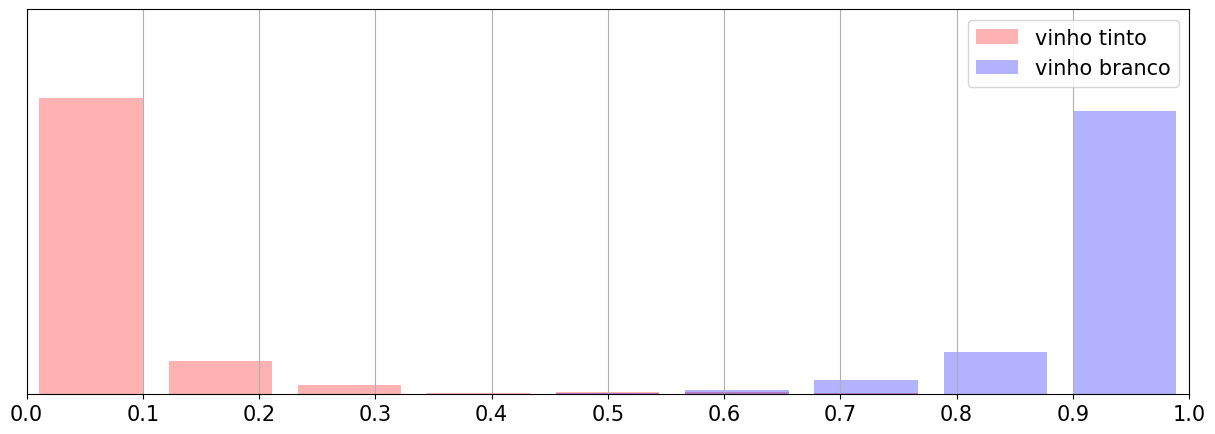

In [148]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [149]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [150]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [151]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

# INSIGHTS

In [152]:
# 1 - verificar dados outliers
# 2 - a base pode conter a nacionalidade e outras características que podem ajudar na classificação

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# VALIDAÇÃO CRUZADA

In [153]:
# Treinar o modelo
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [154]:
print(neigh)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')


In [155]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [156]:
neigh.best_params_, neigh.best_score_, neigh.best_estimator_, neigh.best_index_

({'n_neighbors': 9},
 0.9983455668487053,
 KNeighborsClassifier(n_neighbors=9),
 3)

In [157]:
neigh_y_pred = neigh.predict(X_ts)

In [158]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1143,   13],
       [  14, 1158]], dtype=int64)

In [159]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("neigh_acuracia:", neigh_acuracia)

neigh_acuracia: 0.9884020618556701


In [160]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
neigh_recall = recall_score(y_ts, neigh_y_pred)
print("neigh_recall:", neigh_recall)

neigh_recall: 0.9880546075085325


In [161]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
neigh_precision = precision_score(y_ts, neigh_y_pred)
print("precision_score:", neigh_precision)

precision_score: 0.9888983774551665


In [162]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1156
           1       0.99      0.99      0.99      1172

    accuracy                           0.99      2328
   macro avg       0.99      0.99      0.99      2328
weighted avg       0.99      0.99      0.99      2328



In [163]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9884763124199745

# Validação K-FOLD

In [164]:
validacao = KFold(n_splits = 10, shuffle = True)

In [165]:
reglog = cross_validate(neigh, X_bal_padronizado, y_bal, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

In [166]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.993
Sensibilidade: 0.992
     Precisão: 0.9941


# Testar o modelo com dados da base df_validation

In [167]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [168]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(neigh.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [169]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO identificados corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
25 tipo(s) de vinho(s) NÃO identificados corretamente!


prediction
0    23
1     2
Name: count, dtype: int64

,seq,validation,prediction
20,509,1,0
21,513,1,0
22,529,1,0
23,552,1,0
24,567,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [170]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [171]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [172]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.926 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.932 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.926 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.926 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.947 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.913 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.979 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 2/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 3/10] END criterion=gini, max_leaf_nodes=2048;, score=0.991 total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.991 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.917 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.926 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.921 total time=   0.0s
[CV

[CV 10/10] END criterion=entropy, max_leaf_nodes=512;, score=0.996 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.993 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.989 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.989 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.987 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.991 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.982 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.998 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [173]:
grid.best_params_, grid.best_score_, grid.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9934711854143787,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [174]:
dtc_y_predct_proba = grid.predict_proba(X_ts)[:,1]

In [175]:
dtc_y_predct_proba

array([0.00132217, 0.9972863 , 0.9972863 , ..., 0.9972863 , 0.00132217,
       0.9972863 ])

In [176]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = grid.predict(X_ts)
dtc_y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

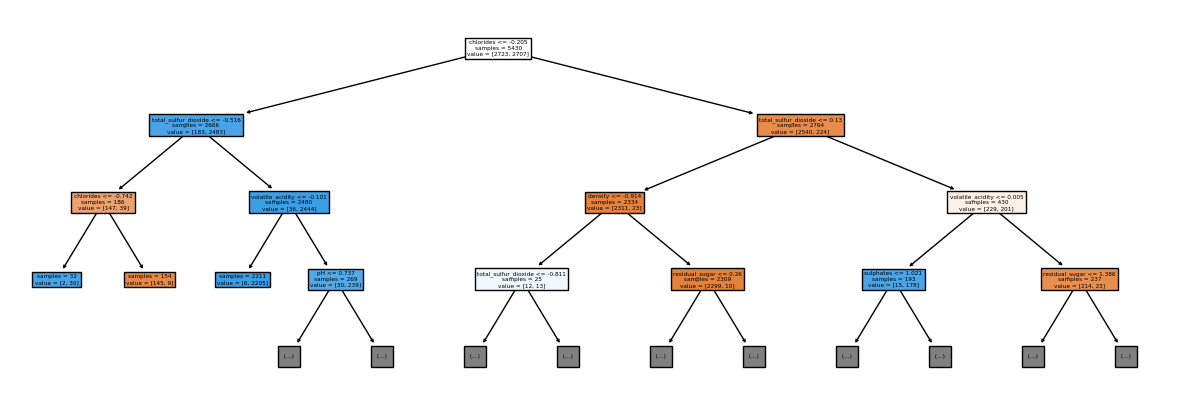

In [177]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(grid.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [178]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9845353519846004

In [179]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1138,   18],
       [  18, 1154]], dtype=int64)

In [180]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9845360824742269


In [181]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
dtc_recall = recall_score(y_ts, dtc_y_pred)
print("dtc_recall:", dtc_recall)

dtc_recall: 0.984641638225256


In [182]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
dtc_precision = precision_score(y_ts, dtc_y_pred)
print("precision_score:", dtc_precision)

precision_score: 0.984641638225256


In [183]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1156
           1       0.98      0.98      0.98      1172

    accuracy                           0.98      2328
   macro avg       0.98      0.98      0.98      2328
weighted avg       0.98      0.98      0.98      2328



In [184]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.984641638225256

# Testar o modelo com dados da base df_validation

In [185]:
validation = list(y_val[0:440].values)
# print(validation)

In [186]:
prediction = list(grid.predict(X_val_padronizado[0:440]))
# print(prediction)

In [187]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

,seq,validation,prediction
0,2,1,0
1,14,1,0
2,19,1,0
3,20,1,0
4,21,1,0
5,27,1,0
6,28,1,0
7,31,1,0
8,46,1,0
9,71,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [188]:
# Treinar o modelo
lr = LogisticRegression(max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500)

In [189]:
# Nos modelos de Classificação com 'Probabilidade' a interpretação corretar é propensão
# Nesse exemplo impresso, a primeira coluna reflete valores com propensão a "0" enquanto que an segunda
# coluna são apresentados valores com propensão a "1"
lr.predict_proba(X_ts).round(4).tolist()[:5]

[[1.0, 0.0], [0.0015, 0.9985], [0.0001, 0.9999], [1.0, 0.0], [0.0002, 0.9998]]

In [190]:
lr_y_pred = lr.predict(X_ts)

In [191]:
# Valores finais de predição do modelo "lr"
lr_y_pred.tolist()[:5]

[0, 1, 1, 0, 1]

In [192]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1140,   16],
       [   5, 1167]], dtype=int64)

In [193]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.990979381443299


In [194]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
lr_recall = recall_score(y_ts, lr_y_pred)
print("lr_recall:", lr_recall)

lr_recall: 0.9957337883959044


In [195]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
lr_precision = precision_score(y_ts, lr_y_pred)
print("precision_score:", lr_precision)

precision_score: 0.9864750633981403


In [196]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1156
           1       0.99      1.00      0.99      1172

    accuracy                           0.99      2328
   macro avg       0.99      0.99      0.99      2328
weighted avg       0.99      0.99      0.99      2328



In [197]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9910828025477708

In [198]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [199]:
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [200]:
rf_y_pred = lr.predict(X_ts)

In [201]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1140,   16],
       [   5, 1167]], dtype=int64)

In [202]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.990979381443299


In [203]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
rf_recall = recall_score(y_ts, rf_y_pred)
print("rf_recall:", rf_recall)

rf_recall: 0.9957337883959044


In [204]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
rf_precision = precision_score(y_ts, rf_y_pred)
print("precision_score:", rf_precision)

precision_score: 0.9864750633981403


In [205]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1156
           1       0.99      1.00      0.99      1172

    accuracy                           0.99      2328
   macro avg       0.99      0.99      0.99      2328
weighted avg       0.99      0.99      0.99      2328



In [206]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9910828025477708

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">
            Consultar documentação "Multi-layer Perceptron (MLP)"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [207]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [208]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [209]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[1140,   16],
       [   2, 1170]], dtype=int64)

In [210]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9922680412371134


In [211]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
mlpc_recall = recall_score(y_ts, mlpc_y_pred)
print("mlpc_recall:", mlpc_recall)

mlpc_recall: 0.9982935153583617


In [212]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
mlpc_precision = precision_score(y_ts, mlpc_y_pred)
print("precision_score:", mlpc_precision)

precision_score: 0.9865092748735245


In [213]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9923664122137404

In [214]:
etc_f1_score > mlpc_f1_score

True

In [215]:
mlpc.best_params_

{'alpha': 5.994842503189409e-06,
 'hidden_layer_sizes': (70, 100),
 'learning_rate_init': 0.03593813663804626}

In [216]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.998749660474509

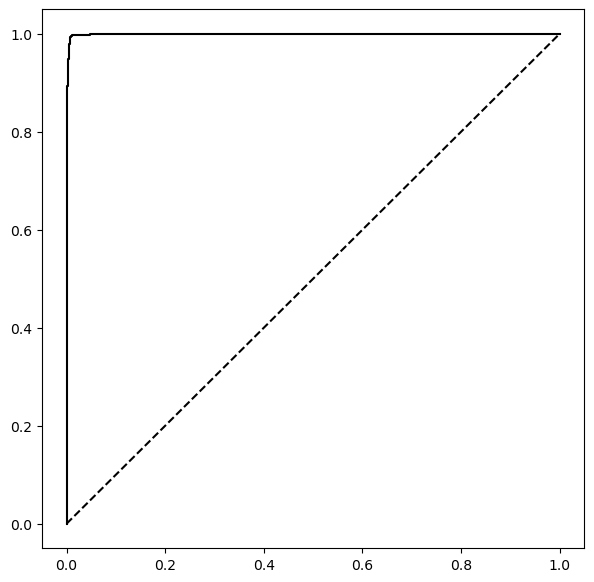

In [217]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

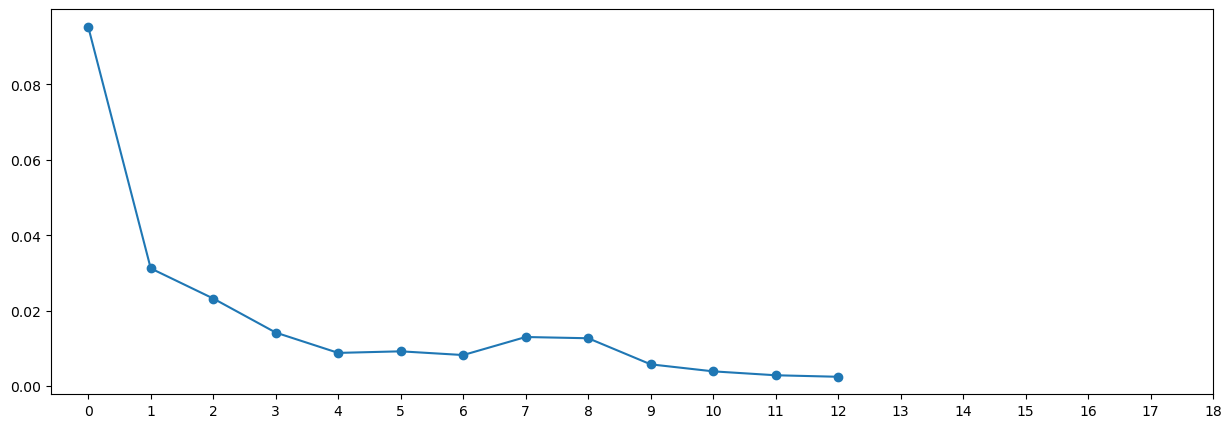

In [218]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [219]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [220]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [221]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
13 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    11
1     2
Name: count, dtype: int64
---


,seq,validation,prediction
8,297,0,1
9,442,1,0
10,462,1,0
11,478,1,0
12,513,1,0


In [222]:
# MATRIZ CONFUSÃO - df Validação
mlpc_y_pred_val = mlpc.predict(X_val_padronizado)
confusion_matrix(y_val, mlpc_y_pred_val)

array([[154,   2],
       [ 11, 418]], dtype=int64)

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [223]:
# ESTUDAR ESSE MODELO COM MAIS ATENÇÃO!
# VERIFICAR OS PARAMETROS
# TESTAR A BASE COM O PRÉ-PROESSAMENTO DO KERAS

# Criando o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],
    )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_ts, y_ts))

Epoch 1/10
170/170 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9772 - val_loss: 0.0405 - val_accuracy: 0.9884
Epoch 2/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9937 - val_loss: 0.0329 - val_accuracy: 0.9927
Epoch 3/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9958 - val_loss: 0.0281 - val_accuracy: 0.9927
Epoch 4/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9965 - val_loss: 0.0233 - val_accuracy: 0.9931
Epoch 5/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0221 - val_accuracy: 0.9931
Epoch 6/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0189 - val_accuracy: 0.9931
Epoch 7/10
170/170 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.0193 - val_accuracy: 0.9936
Epoch 

In [224]:
# Avaliar o modelo nos dados de teste
evaluation = model.evaluate(X_ts, y_ts)

# Fazer previsões usando o modelo nos dados de teste
predictions = model.predict(X_ts)
predicted_labels = (predictions > 0.5).astype("int32")  # Se for um modelo de classificação binária

# Calcular métricas
model_precision = precision_score(y_ts, predicted_labels)
model_recall = recall_score(y_ts, predicted_labels)
model_f1_score = f1_score(y_ts, predicted_labels)

# Imprimir métricas
print("Perda (Loss):", evaluation[0])
print("Acurácia (Accuracy):", evaluation[1])
print("Precisão (Precision):", model_precision)
print("Recall:", model_recall)
print("F1-score:", model_f1_score)

73/73 [==============================] - 0s 1ms/step
Perda (Loss): 0.015727205201983452
Acurácia (Accuracy): 0.994415819644928
Precisão (Precision): 0.9898562975486053
Recall: 0.9991467576791809
F1-score: 0.99447983014862


In [225]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [226]:
probabilidades = model.predict(X_val_padronizado[start:end])

# Definindo um limiar
limiar = 0.5

# Convertendo probabilidades em rótulos (0 ou 1) com base no limiar
prediction = [1 if prob >= limiar else 0 for prob in probabilidades]

# print(prediction)

19/19 [==============================] - 0s 868us/step


In [227]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
14 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    12
1     2
Name: count, dtype: int64
---


,seq,validation,prediction
9,442,1,0
10,462,1,0
11,490,1,0
12,552,1,0
13,568,1,0


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Combinação de Modelos
        </b>
    <br/>&nbsp;
</center>

In [236]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)
model = [('LogisticRegression', rf), ('KNeighborsClassifier', neigh), ('ExtraTreesClassifier', etc)]
combined_model = VotingClassifier(model, voting = 'hard')
medidas = cross_validate(combined_model, X_tr, y_tr, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9952

In [237]:
combined_model.fit(X_tr, y_tr)

VotingClassifier(estimators=[('LogisticRegression',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=1000,
                                                     n_jobs=-1)),
                             ('KNeighborsClassifier',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': array([3, 5, 7, 9])},
                                           scoring='roc_auc')),
                             ('ExtraTreesClassifier',
                              ExtraTreesClassifier(max_depth=10,
                                                   n_estimators=500,
                                                   n_jobs=-1))])

In [230]:
validation[:20]

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]

In [238]:
prediction = list(combined_model.predict(X_val_padronizado[start:end]))
# print(prediction)

In [239]:
prediction[:20]

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]

In [240]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

585 registros lidos
---
24 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    22
1     2
Name: count, dtype: int64
---


,seq,validation,prediction
19,501,1,0
20,509,1,0
21,529,1,0
22,552,1,0
23,567,1,0


In [241]:
# MATRIZ CONFUSÃO - df Validação
combined_model_y_pred_val = combined_model.predict(X_val_padronizado)
confusion_matrix(y_val, combined_model_y_pred_val)

array([[154,   2],
       [ 22, 407]], dtype=int64)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [235]:
# data frame modelos
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC', 'TensorFlow'],
    'accuracy':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia, evaluation[1]],
    'recall':[etc_recall,neigh_recall,dtc_recall, lr_recall, rf_recall, mlpc_recall, model_recall],
    'precision':[etc_precision,neigh_precision,dtc_precision, lr_precision, rf_precision, mlpc_precision, model_precision],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score, model_f1_score]
    }    
modelos = pd.DataFrame(dfm)
modelos.style.highlight_max(subset=list(modelos.columns.drop('modelo')))

,modelo,accuracy,recall,precision,f1_score
0,Extra Trees Classifier,0.992698,0.997440,0.988166,0.992781
1,KNeighbors Classifier,0.988402,0.988055,0.988898,0.988476
2,Decision Tree Classifier,0.984536,0.984642,0.984642,0.984642
3,Logistic Regression,0.990979,0.995734,0.986475,0.991083
4,Random Forest Classifier,0.990979,0.995734,0.986475,0.991083
5,Neural Network MLPC,0.992268,0.998294,0.986509,0.992366
6,TensorFlow,0.994416,0.999147,0.989856,0.994480
